In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

### 数据加载

In [35]:
x, y = make_blobs( n_samples=100, centers=6, random_state=1234, cluster_std=0.6) 

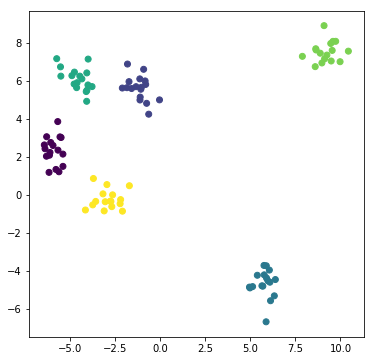

In [43]:
plt.figure(figsize=(6,6))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [44]:
# 引入scipy中的距离函数，默认是欧式距离
from scipy.spatial.distance import cdist

In [45]:
class K_Means(object):
    # 初始化，参数n_cluster聚类类别，迭代次数max_iter，初始质心，
    def __init__(self, n_clusters = 6, max_iter=100,centroids=[]):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = np.array(centroids,dtype = np.float64)
        
    # 无监督学习，传入data
    def fit(self,data):
        
        if(self.centroids.shape==(0,)):
            self.centroids = data[np.random.randint(0, data.shape[0],self.n_clusters),:]
            
        for i in range(self.max_iter):
            
            # 计算距离，得到一个100*5的矩阵
            distance = cdist(data, self.centroids)
            
            # 对距离由近到远排序，选区最近的质心点的类别，作为当前点的分类
            c_ind = np.argmin(distance, axis=1)
            
            # 对每一类数据进行均值计算，更新质心点的坐标
            for i in range(self.n_clusters):
                
                if i in c_ind:
                    self.centroids[i] = np.mean(data[c_ind==i], axis=0)
    def predict(self, samples):
        distance = cdist(samples, self.centroids)
        c_ind = np.argmin(distance, axis=1)
        return c_ind
    

### 测试

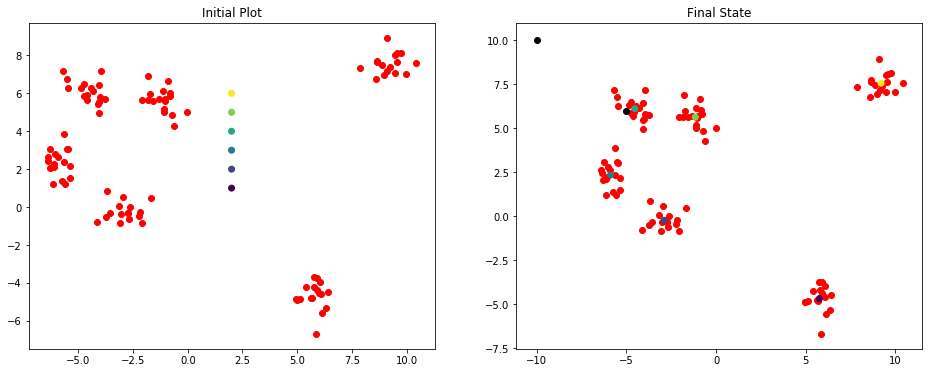

[3 3]
[[ 5.76444812 -4.67941789]
 [-2.89174024 -0.22808556]
 [-5.89115978  2.33887408]
 [-4.53406813  6.11523454]
 [-1.15698106  5.63230377]
 [ 9.20551979  7.56124841]]


In [48]:
def plotKMeans(x, y, centroids, subplot, title):
    plt.subplot(subplot)
    plt.scatter(x[:,0], x[:,1], c='r')
    plt.scatter(centroids[:,0],centroids[:,1],c=np.array(range(6)))
    plt.title(title)
plt.figure(figsize=(16, 6))
kmeans = K_Means(max_iter=100,centroids=np.array([[2,1],[2,2],[2,3],[2,4],[2,5],[2,6]]))
plotKMeans(x,y,kmeans.centroids,121,"Initial Plot")

kmeans.fit(x)

plotKMeans(x,y,kmeans.centroids,122,"Final State")

new_data = np.array([[-10,10],[-5,6]])
new_pred = kmeans.predict(new_data)
plt.scatter(new_data[:,0],new_data[:,1],c='black')
plt.show()
print(new_pred)
print(kmeans.centroids)